In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
from PALD import GPALD

In [2]:
def draw_graph(G, node_membership=None, pos=None):
    if not pos:
        pos = nx.spring_layout(G, scale=50, seed=429)
    if node_membership:
        tab10 = colormaps["tab10"]
        node_colors = list(map(lambda cluster_id: (0.3, 0.3, 0.3) if cluster_id == -1 else tab10(cluster_id), node_membership.values()))
        nodelist = list(map(lambda k: k, node_membership.keys()))
        nx.draw_networkx_nodes(G, pos=pos, nodelist=nodelist, node_color=node_colors, node_size=100)
    else:
        nx.draw_networkx_nodes(G, pos=pos)
    nx.draw_networkx_edges(G, pos=pos)

# We begin with a small ABCDo graph, 100 nodes with 5 of them outliers

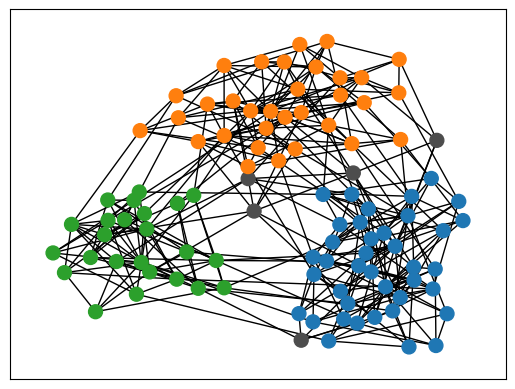

In [3]:
data_dir = "ABCDo-data/graphs_100/"
graph = "02_5"
# Read the graph from the edge list
edge_file = data_dir + "edge" + graph + ".dat"
G = nx.read_edgelist(edge_file, nodetype=int, edgetype=int)

# Load ground truth and massage into node->cluster dictionary
ground_truth_file = data_dir + "com" + graph + ".dat"
ground_truth_array = np.loadtxt(ground_truth_file, dtype="int16", usecols=(1))
# Nodes are 1-100, array cluster ids are 1-n with 1 as outliers, convert to 0-n-1 and -1 for outliers
ground_truth = {i+1:ground_truth_array[i] - 2 for i in range(len(ground_truth_array))}

# Draw graph colored by ground truth
pos = nx.spring_layout(G)
draw_graph(G, node_membership=ground_truth, pos=pos)

# Cluster with GPALD

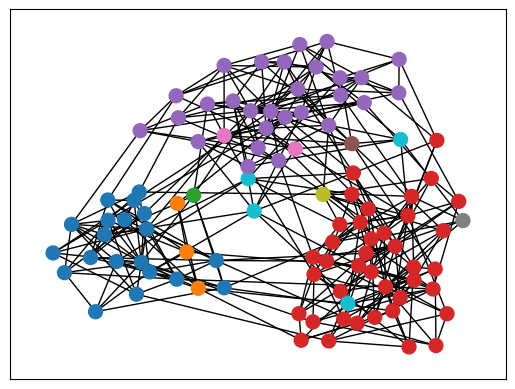

In [4]:
gpald = GPALD()
gpald_predict = gpald.fit_predict(G)
draw_graph(G, gpald_predict, pos=pos)

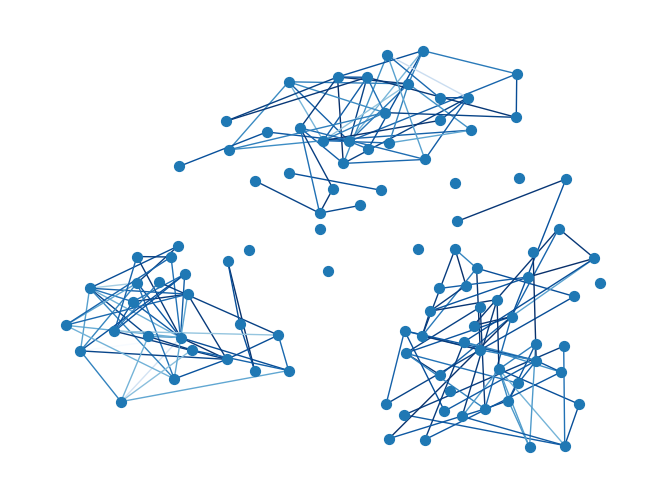

In [5]:
edgelist = list(gpald.cluster_graph.edges)


options = {
    "edge_color": [gpald.cluster_graph.get_edge_data(i,j)["weight"] for i,j in edgelist],
    "edgelist": edgelist,
    "edge_cmap": plt.cm.Blues,
    "width": 1,
    "pos": pos,
    "node_size": 50,
}
nx.draw(gpald.cluster_graph, **options)

# Karate Club Example

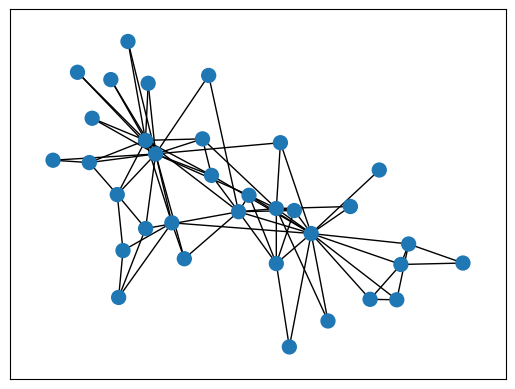

In [7]:
G = nx.karate_club_graph()
gpald = GPALD()
gpald_predict = gpald.fit_predict(G)

pos=nx.spring_layout(G)

draw_graph(G, gpald_predict, pos=pos)


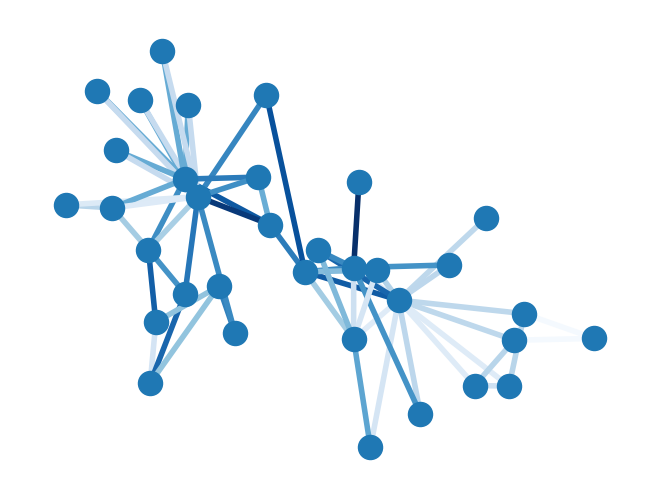

In [8]:
options = {
    "edge_color": [w for i,j,w in gpald.cluster_graph.edges.data("weight")],
    "edge_cmap": plt.cm.Blues,
    "width": 4,
    "pos": pos
}
nx.draw(gpald.cluster_graph, **options)